# Devoir 1 : Chaine de valeur de l'énergie

Le mandat dans le plan de cours est le suivant: 

>Le premier travail (15 %) consiste en une présentation de données énergétiques spécifiques, à partir d’une des sources de données principales décrite à la séance 1 (IEA, EIA, BP/Statistical Review of World Energy, Statistique Canada), ou à partir d'une autre source discutée avec le professeur, sur un thème choisi par l’étudiant.
Le document remis doit avoir au plus 10 pages, contenir les sources des données, des tableaux de données, des graphiques (originaux, c'est à dire que vous avez vous-même créé, et non pas copié-collé d'autres documents), des comparaisons pertinentes entre pays ou énergies et une discussion sur des tendances.
C'est un travail qui vise essentiellement à être descriptif.
>
>Vous ne pouvez pas avoir recours à l'Intelligence artificielle générative (IAG). Vous devez générer vous même un sujet, des graphiques et des commentaires.



## Création de l'API et importation des données





In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from utils.eia_internation_data_queries import eia_api_PC,plot_by_region_and_type 

api = eia_api_PC()
plt.rcParams['figure.figsize'] = [25, 8]

## Importation des données de population et de PIB
On peut aller chercher quels sont les numéros de requêtes et les unités dans cet utilitaire:
https://www.eia.gov/opendata/browser/

Commençons par les données socio économiques de base

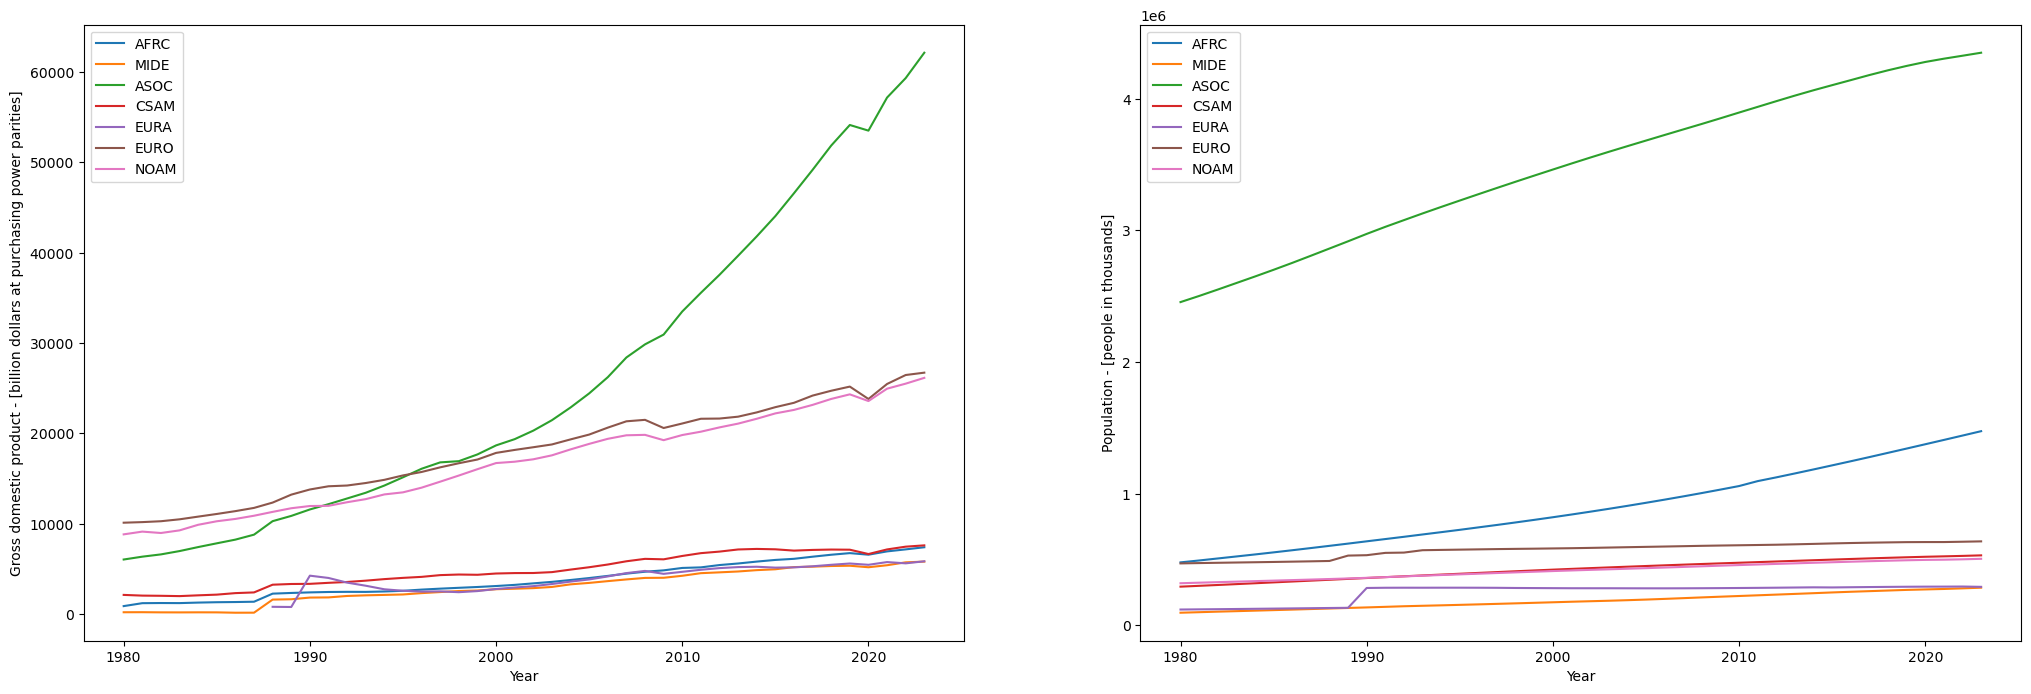

In [3]:
# Commençons par les données de population e de PIB
data_ses = api.get_data_by_id(["4701","4702"])
plot_by_region_and_type(data_ses,kind="line")

## Importation des données sur l'énergie consommée
 Les données sur l'énergie consommées sont disponible sous forme d'énergie primaire totale mais aussi par type de carburant

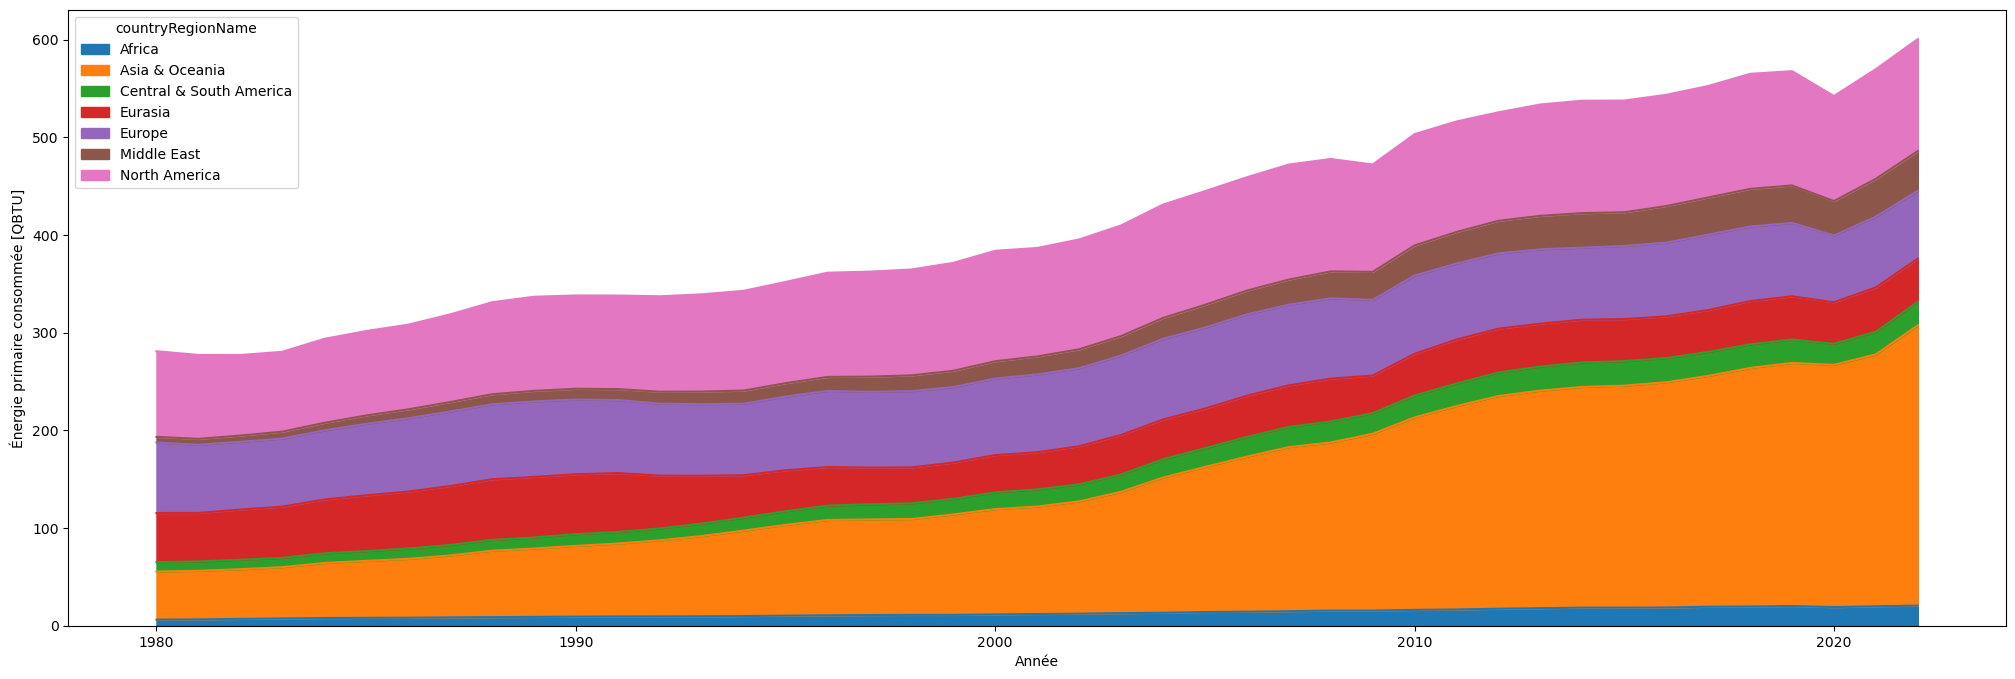

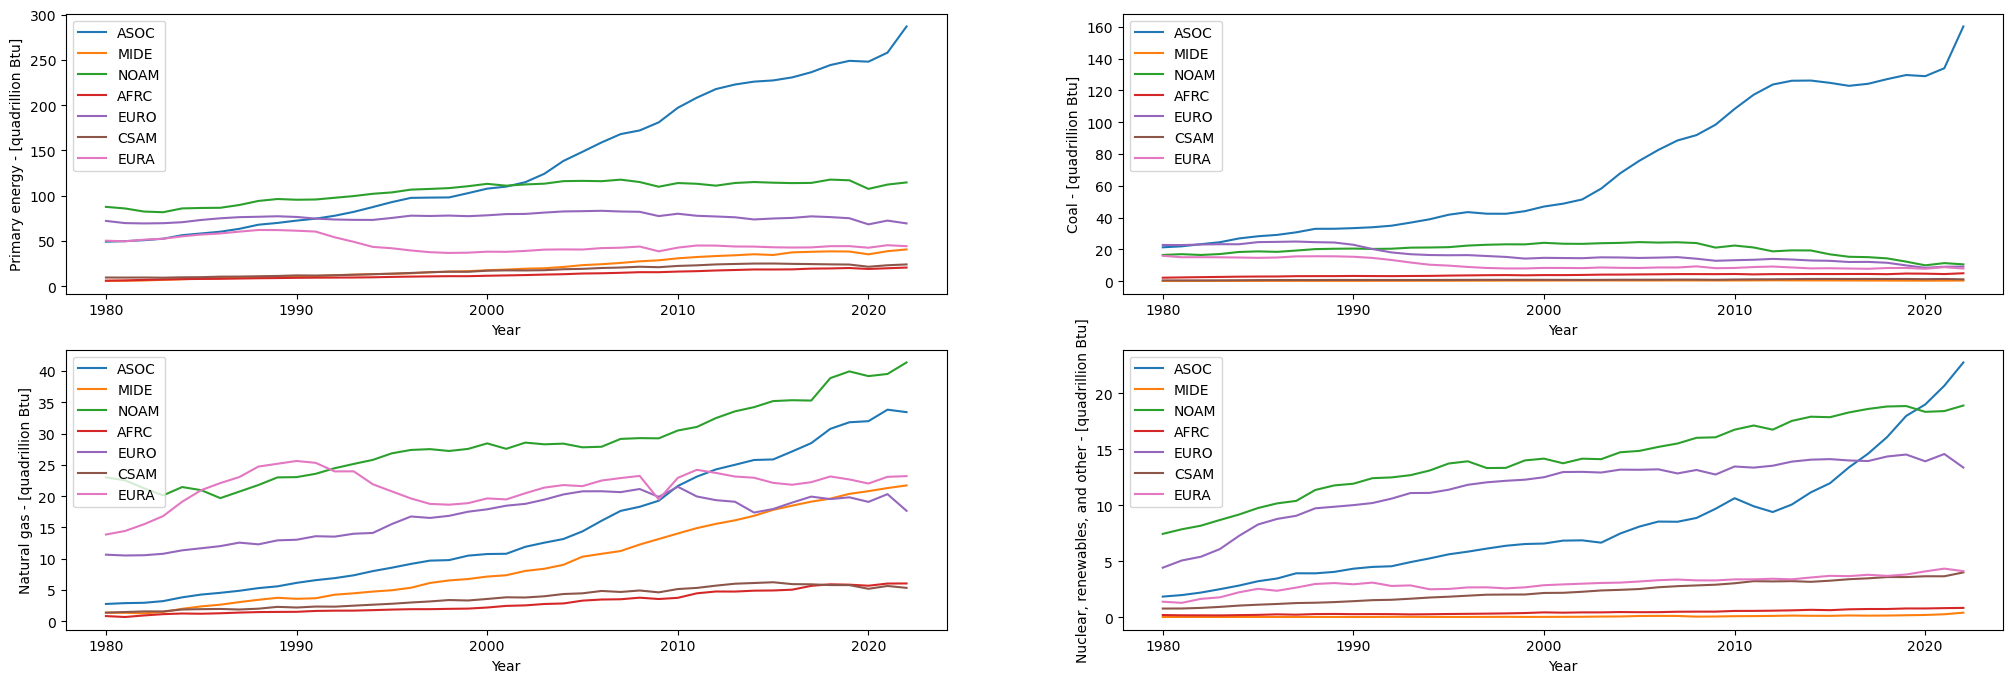

In [17]:
data_energy = api.get_data_by_id(["44","4411","4413","4419"],"QBTU")
data_energy_consumption = data_energy.loc[data_energy["activityName"]=="Consumption"]
data_primary_energy = data_energy.loc[(data_energy["productName"]=="Primary energy") & (data_energy["activityName"]=="Consumption")]
data_primary_energy_pivot = data_primary_energy.pivot(index="period",columns="countryRegionName",values="value")
data_primary_energy_pivot.plot(kind="area",xlabel="Année",ylabel="Énergie primaire consommée [QBTU]")

plot_by_region_and_type(data_energy_consumption,kind="line")

## Imporation des données sur les émissions de GES
On peut aussi importer les données de GES de l'API de l'EIA

<Axes: xlabel='Année', ylabel='GES [Millions Tonnes Métriques]'>

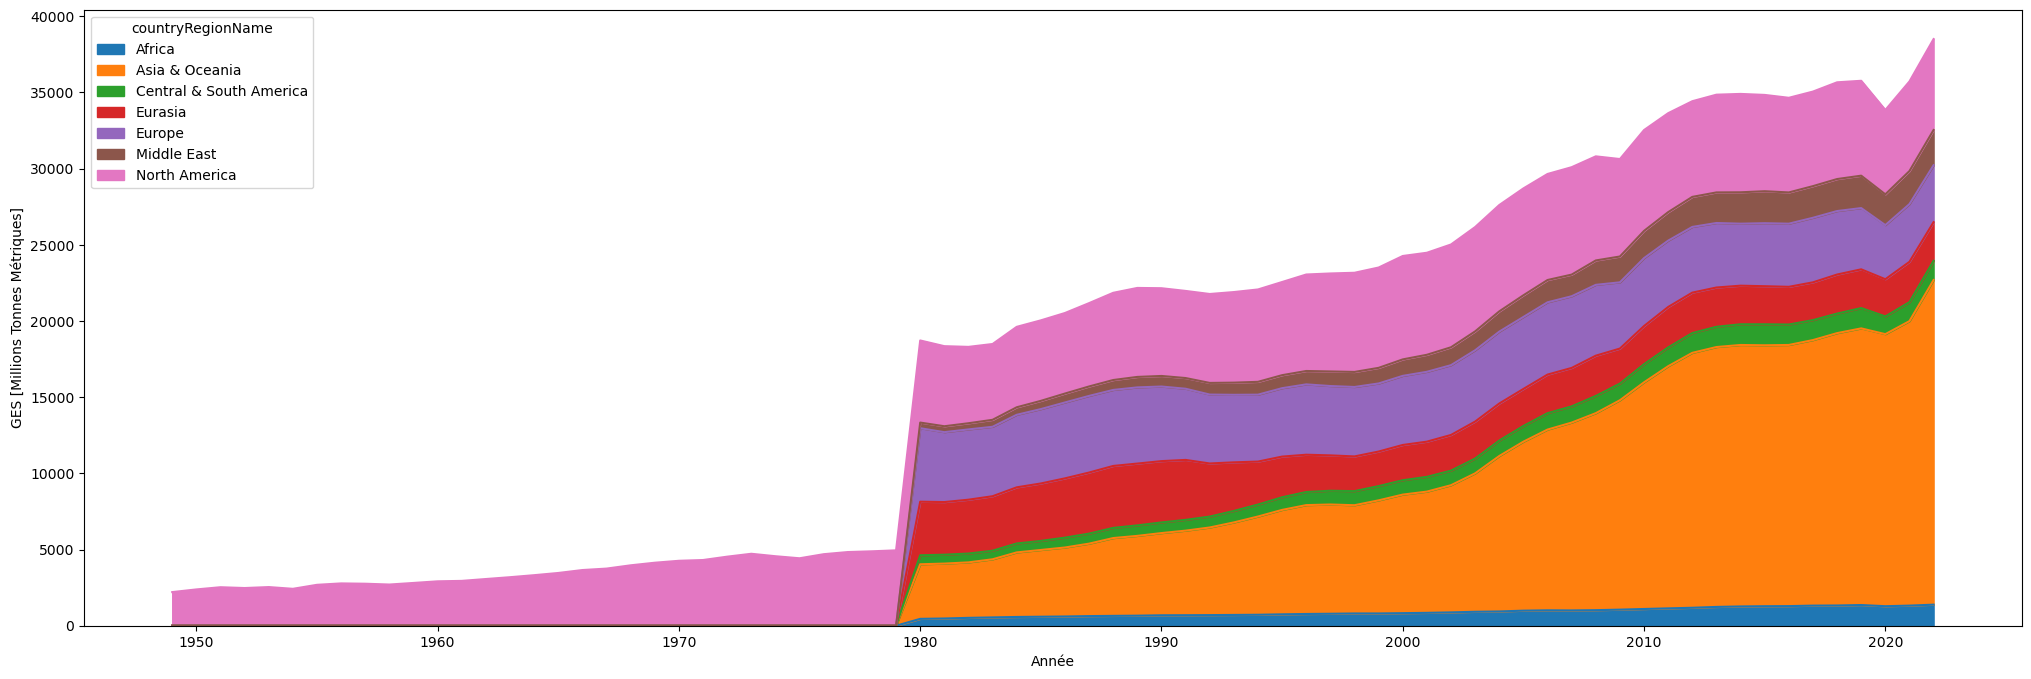

In [12]:
data_emissions = api.get_data_by_id(["4008","4002","3002","4006"])
data_emissions_total = data_emissions.loc[data_emissions["productName"]=="CO2 emissions"]
dude = data_emissions_total.index[0]
data_emissions_total_units = data_emissions_total.loc[dude,"unitName"]
data_emissions_total_pivot = data_emissions_total.pivot(index="period",columns="countryRegionName",values="value")
data_emissions_total_pivot.plot(kind="area",xlabel="Année",ylabel="GES [Millions Tonnes Métriques]")